In [37]:
from bokeh.plotting import figure, show
from bokeh.tile_providers import get_provider, Vendors
from bokeh.io import save, reset_output, output_notebook
import folium
from pyspark.sql import SparkSession
import warnings
warnings.filterwarnings("ignore")
import pyspark.sql.functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import col, datediff, round, to_date, lit, desc, date_format, when
import pyspark.sql.functions as F
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300


from pyspark.sql.types import *
from pyspark.sql.functions import col
from pyspark import SparkContext

# create a spark session (which will run spark jobs)
spark = SparkSession.builder.getOrCreate()

sc = SparkContext.getOrCreate(conf=swan_spark_conf) #Start the spark context
spark.conf.set('spark.sql.execution.arrow.pyspark.enabled', True)
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)



In [38]:
# Holiday Filter, True for all days not been weekend but holiday
# df.loc[isHoliday(df["date"])       # Select Dataframe if is holiday
def isHoliday(df_column):
    holidays = [
        "2019-01-01",
        "2019-01-21",
        "2019-02-12",
        "2019-02-18",
        "2019-05-12",
        "2019-05-27",
    ]
    return df_column.astype(str).str.contains('|'.join(holidays))

holidays = [
        "2019-01-01",
        "2019-01-21",
        "2019-02-12",
        "2019-02-18",
        "2019-05-12",
        "2019-05-27",
    ]

## HV FHV Data Load

In [39]:
### Day of Week Summary (GroupBy DOW)

## Get Dataframe
sdf_fhv_day_data = spark.read.parquet("../preprocessed_data/hvfhv_daily.parquet/")
sdf_fhv_day_data = sdf_fhv_day_data.orderBy("date")
## Eyeballing and find outlier that pickups are very low after May, Mainly Because Memorial Holiday
sdf_fhv_day_data = sdf_fhv_day_data.filter(sdf_fhv_day_data["date"]<=lit("2019-05-10"))  
sdf_fhv_day_data = sdf_fhv_day_data.filter(sdf_fhv_day_data["date"]>=lit("2019-02-01"))  
fhv_df = sdf_fhv_day_data.toPandas()
hvfhv_daily = fhv_df

WEEKDAY = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

## Exclude Holiday as it may distort the result
#NormalDay
dow_df_pre_normal = fhv_df.loc[~isHoliday(fhv_df["date"])]
dow_df_normal_hvfhv = fhv_df.groupby("DayOfWeek").median().reindex(WEEKDAY) 

#Holiday
dow_df_holiday = fhv_df.loc[isHoliday(fhv_df["date"])].groupby("DayOfWeek").median().reindex(WEEKDAY) 

## FHV Data Load

In [40]:
### Day of Week Summary (GroupBy DOW)

## Get Dataframe
sdf_fhv_day_data = spark.read.parquet("../preprocessed_data/fhv_daily.parquet/")
sdf_fhv_day_data = sdf_fhv_day_data.orderBy("date")
## Eyeballing and find outlier that pickups are very low after May, Mainly Because Memorial Holiday
sdf_fhv_day_data = sdf_fhv_day_data.filter(sdf_fhv_day_data["date"]<=lit("2019-05-10"))  
sdf_fhv_day_data = sdf_fhv_day_data.filter(sdf_fhv_day_data["date"]>=lit("2019-02-01"))  
fhv_df = sdf_fhv_day_data.toPandas()
fhv_daily = fhv_df

WEEKDAY = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

## Exclude Holiday as it may distort the result
#NormalDay
dow_df_pre_normal = fhv_df.loc[~isHoliday(fhv_df["date"])]
dow_df_normal_fhv = fhv_df.groupby("DayOfWeek").median().reindex(WEEKDAY) 

#Holiday
dow_df_holiday = fhv_df.loc[isHoliday(fhv_df["date"])].groupby("DayOfWeek").median().reindex(WEEKDAY) 

## Yellow Data Load

In [41]:
### Day of Week Summary (GroupBy DOW)

## Get Dataframe
sdf_fhv_day_data = spark.read.parquet("../preprocessed_data/yellow_daily.parquet/")
sdf_fhv_day_data = sdf_fhv_day_data.orderBy("date")
## Eyeballing and find outlier that pickups are very low after May, Mainly Because Memorial Holiday
sdf_fhv_day_data = sdf_fhv_day_data.filter(sdf_fhv_day_data["date"]<=lit("2019-05-10"))  
sdf_fhv_day_data = sdf_fhv_day_data.filter(sdf_fhv_day_data["date"]>=lit("2019-02-01"))  
fhv_df = sdf_fhv_day_data.toPandas()
yellow_daily = fhv_df


WEEKDAY = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

## Exclude Holiday as it may distort the result
#NormalDay
dow_df_pre_normal = fhv_df.loc[~isHoliday(fhv_df["date"])]
dow_df_normal_yellow = fhv_df.groupby("DayOfWeek").median().reindex(WEEKDAY) 

#Holiday
dow_df_holiday = fhv_df.loc[isHoliday(fhv_df["date"])].groupby("DayOfWeek").median().reindex(WEEKDAY) 

## Green Data Load

In [42]:
### Day of Week Summary (GroupBy DOW)

## Get Dataframe
sdf_fhv_day_data = spark.read.parquet("../preprocessed_data/green_daily.parquet/")
sdf_fhv_day_data = sdf_fhv_day_data.orderBy("date")
## Eyeballing and find outlier that pickups are very low after May, Mainly Because Memorial Holiday
sdf_fhv_day_data = sdf_fhv_day_data.filter(sdf_fhv_day_data["date"]<=lit("2019-05-10"))  
sdf_fhv_day_data = sdf_fhv_day_data.filter(sdf_fhv_day_data["date"]>=lit("2019-02-01"))  
fhv_df = sdf_fhv_day_data.toPandas()
green_daily = fhv_df

WEEKDAY = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

## Exclude Holiday as it may distort the result
#NormalDay
dow_df_pre_normal = fhv_df.loc[~isHoliday(fhv_df["date"])]
dow_df_normal_green = fhv_df.groupby("DayOfWeek").median().reindex(WEEKDAY) 

#Holiday
dow_df_holiday = fhv_df.loc[isHoliday(fhv_df["date"])].groupby("DayOfWeek").median().reindex(WEEKDAY) 

## Traffic Data Load

In [43]:
## Get Dataframe
traffic_daily = pd.read_parquet("../preprocessed_data/traffic_daily.parquet")
dow_df_normal_traffic = traffic_daily.groupby("DayOfWeek").sum()
# Reset Index and Sort By Week Day
dow_df_normal_traffic = dow_df_normal_traffic.reindex(WEEKDAY).reset_index()
#dow_df_normal_traffic

In [44]:
traffic_daily.head(3)

,date,Volume,DayOfWeek
0,2018-01-20,166016,Sat
1,2018-01-21,132531,Sun
2,2018-01-22,173544,Mon


In [45]:
### With Week Day Data, It is shown that Exclude Weekend, Taxi, FHV has correlated movement on # of Pickups

In [46]:
## Week Day Data Correlation (Weekend Included)
taxi_traffic_df = pd.DataFrame()


taxi_traffic_df["YellowTaxi"] = dow_df_normal_yellow["NumofPickUps"].tolist()
taxi_traffic_df["GreenTaxi"] = dow_df_normal_green["NumofPickUps"].tolist()
taxi_traffic_df["FHV"] = dow_df_normal_fhv["NumofPickUps"].tolist()
taxi_traffic_df["HVFHV"] = dow_df_normal_hvfhv["NumofPickUps"].tolist()
taxi_traffic_df["Traffic"] = dow_df_normal_traffic["Volume"].tolist()
taxi_traffic_df.corr()

,YellowTaxi,GreenTaxi,FHV,HVFHV,Traffic
YellowTaxi,1.000000,0.931919,0.555947,0.400178,-0.229838
GreenTaxi,0.931919,1.000000,0.462331,0.583217,-0.108182
FHV,0.555947,0.462331,1.000000,-0.442803,-0.852805
HVFHV,0.400178,0.583217,-0.442803,1.000000,0.670848
Traffic,-0.229838,-0.108182,-0.852805,0.670848,1.000000


In [47]:
## Week Day Data Correlation (Weekend Removed)
taxi_traffic_df = pd.DataFrame()


taxi_traffic_df["YellowTaxi"] = dow_df_normal_yellow["NumofPickUps"].tolist()[0:5]
taxi_traffic_df["GreenTaxi"] = dow_df_normal_green["NumofPickUps"].tolist()[0:5]
taxi_traffic_df["FHV"] = dow_df_normal_fhv["NumofPickUps"].tolist()[0:5]
taxi_traffic_df["HVFHV"] = dow_df_normal_hvfhv["NumofPickUps"].tolist()[0:5]
taxi_traffic_df["Traffic"] = dow_df_normal_traffic["Volume"].tolist()[0:5]
taxi_traffic_df.corr()

,YellowTaxi,GreenTaxi,FHV,HVFHV,Traffic
YellowTaxi,1.000000,0.888905,0.636775,0.790196,-0.784935
GreenTaxi,0.888905,1.000000,0.659045,0.977286,-0.780896
FHV,0.636775,0.659045,1.000000,0.538137,-0.935671
HVFHV,0.790196,0.977286,0.538137,1.000000,-0.677474
Traffic,-0.784935,-0.780896,-0.935671,-0.677474,1.000000


In [48]:
## Daily Data Correlation (Weekend Removed)

taxi_traffic_df = pd.DataFrame()

#taxi_traffic_df["Traffic"] = traffic_daily["Volume"].tolist()
taxi_traffic_df["YellowTaxi"] = yellow_daily[yellow_daily["isWeekend"]==False]["NumofPickUps"].tolist()
taxi_traffic_df["GreenTaxi"] = green_daily[green_daily["isWeekend"]==False]["NumofPickUps"].tolist()
taxi_traffic_df["FHV"] = fhv_daily[fhv_daily["isWeekend"]==False]["NumofPickUps"].tolist()
taxi_traffic_df["HVFHV"] = hvfhv_daily[hvfhv_daily["isWeekend"]==False]["NumofPickUps"].tolist()
taxi_traffic_df.corr()

,YellowTaxi,GreenTaxi,FHV,HVFHV
YellowTaxi,1.000000,0.724180,0.148973,0.713213
GreenTaxi,0.724180,1.000000,-0.068348,0.611978
FHV,0.148973,-0.068348,1.000000,-0.081447
HVFHV,0.713213,0.611978,-0.081447,1.000000


In [49]:
## Daily Data Correlation (Weekend!!)

taxi_traffic_df = pd.DataFrame()

#taxi_traffic_df["Traffic"] = traffic_daily["Volume"].tolist()
taxi_traffic_df["YellowTaxi"] = yellow_daily[yellow_daily["isWeekend"]==True]["NumofPickUps"].tolist()
taxi_traffic_df["GreenTaxi"] = green_daily[green_daily["isWeekend"]==True]["NumofPickUps"].tolist()
taxi_traffic_df["FHV"] = fhv_daily[fhv_daily["isWeekend"]==True]["NumofPickUps"].tolist()
taxi_traffic_df["HVFHV"] = hvfhv_daily[hvfhv_daily["isWeekend"]==True]["NumofPickUps"].tolist()
taxi_traffic_df.corr()

,YellowTaxi,GreenTaxi,FHV,HVFHV
YellowTaxi,1.000000,0.834958,0.245740,0.859393
GreenTaxi,0.834958,1.000000,0.170664,0.703556
FHV,0.245740,0.170664,1.000000,0.010461
HVFHV,0.859393,0.703556,0.010461,1.000000


In [50]:
yellow_daily

,date,NumofPickUps,avg_duration,avg_trip_distance,avg_earn,avg_speed,avg_fare_amount,isWeekend,DayOfWeek
0,2019-02-01,231065,11.085,1.73666,12.278,10.04714,9.496,False,Fri
1,2019-02-02,212681,10.329,1.83799,13.801,11.40007,9.336,True,Sat
2,2019-02-03,173534,9.454,1.95224,14.118,12.93129,9.177,True,Sun
3,2019-02-04,178765,10.355,1.81624,14.575,11.20141,9.324,False,Mon
4,2019-02-05,196263,10.853,1.80001,14.839,10.64140,9.498,False,Tue
...,...,...,...,...,...,...,...,...,...
94,2019-05-06,171520,10.775,1.81554,14.833,10.94314,9.531,False,Mon
95,2019-05-07,191999,11.250,1.78609,15.040,10.32898,9.666,False,Tue
96,2019-05-08,192598,11.572,1.79828,15.242,10.23370,9.842,False,Wed
97,2019-05-09,203586,11.712,1.78402,15.290,10.01195,9.871,False,Thu


In [51]:
## Daily Data Correlation (Total!)

taxi_traffic_df = pd.DataFrame()

#taxi_traffic_df["Traffic"] = traffic_daily["Volume"].tolist()
taxi_traffic_df["DOW"] = yellow_daily["DayOfWeek"].tolist()
taxi_traffic_df["YellowTaxi"] = yellow_daily["NumofPickUps"].tolist()
taxi_traffic_df["GreenTaxi"] = green_daily["NumofPickUps"].tolist()
taxi_traffic_df["FHV"] = fhv_daily["NumofPickUps"].tolist()
taxi_traffic_df["HVFHV"] = hvfhv_daily["NumofPickUps"].tolist()
taxi_traffic_df.head(3)

,DOW,YellowTaxi,GreenTaxi,FHV,HVFHV
0,Fri,231065,20800,68269,858400
1,Sat,212681,19052,54686,864783
2,Sun,173534,15450,47666,755193


## Week Day Only without holiday

In [52]:
## Other Attributes

## Concatenate All Attributes:

taxi_traffic_df = pd.DataFrame()
taxi_traffic_df = pd.concat(
    [
    
    yellow_daily[yellow_daily["isWeekend"]==False]["date"],
    yellow_daily[yellow_daily["isWeekend"]==False]["NumofPickUps"], 
     yellow_daily[yellow_daily["isWeekend"]==False]["avg_earn"], 
     yellow_daily[yellow_daily["isWeekend"]==False]["avg_speed"], 
     yellow_daily[yellow_daily["isWeekend"]==False]["avg_duration"], 
     yellow_daily[yellow_daily["isWeekend"]==False]["avg_trip_distance"], 
     green_daily[green_daily["isWeekend"]==False]["NumofPickUps"], 
    hvfhv_daily[hvfhv_daily["isWeekend"]==False]["NumofPickUps"],
    fhv_daily[fhv_daily["isWeekend"]==False]["NumofPickUps"]],
    axis=1)
symbols = ['date','YellowPicks','YellowEarn', 'YellowSpeed', 'YellowDuration', 'YellowDistance','GreenPicks', 'HVFHVPicks', 'FHVPicks']

taxi_traffic_df.columns = symbols
taxi_traffic_df.set_index("date",inplace=True)
taxi_traffic_df.head(3)

,YellowPicks,YellowEarn,YellowSpeed,YellowDuration,YellowDistance,GreenPicks,HVFHVPicks,FHVPicks
date,,,,,,,,
2019-02-01,231065,12.278,10.04714,11.085,1.73666,20800,858400,68269
2019-02-04,178765,14.575,11.20141,10.355,1.81624,16542,591207,59975
2019-02-05,196263,14.839,10.64140,10.853,1.80001,16186,575586,58462


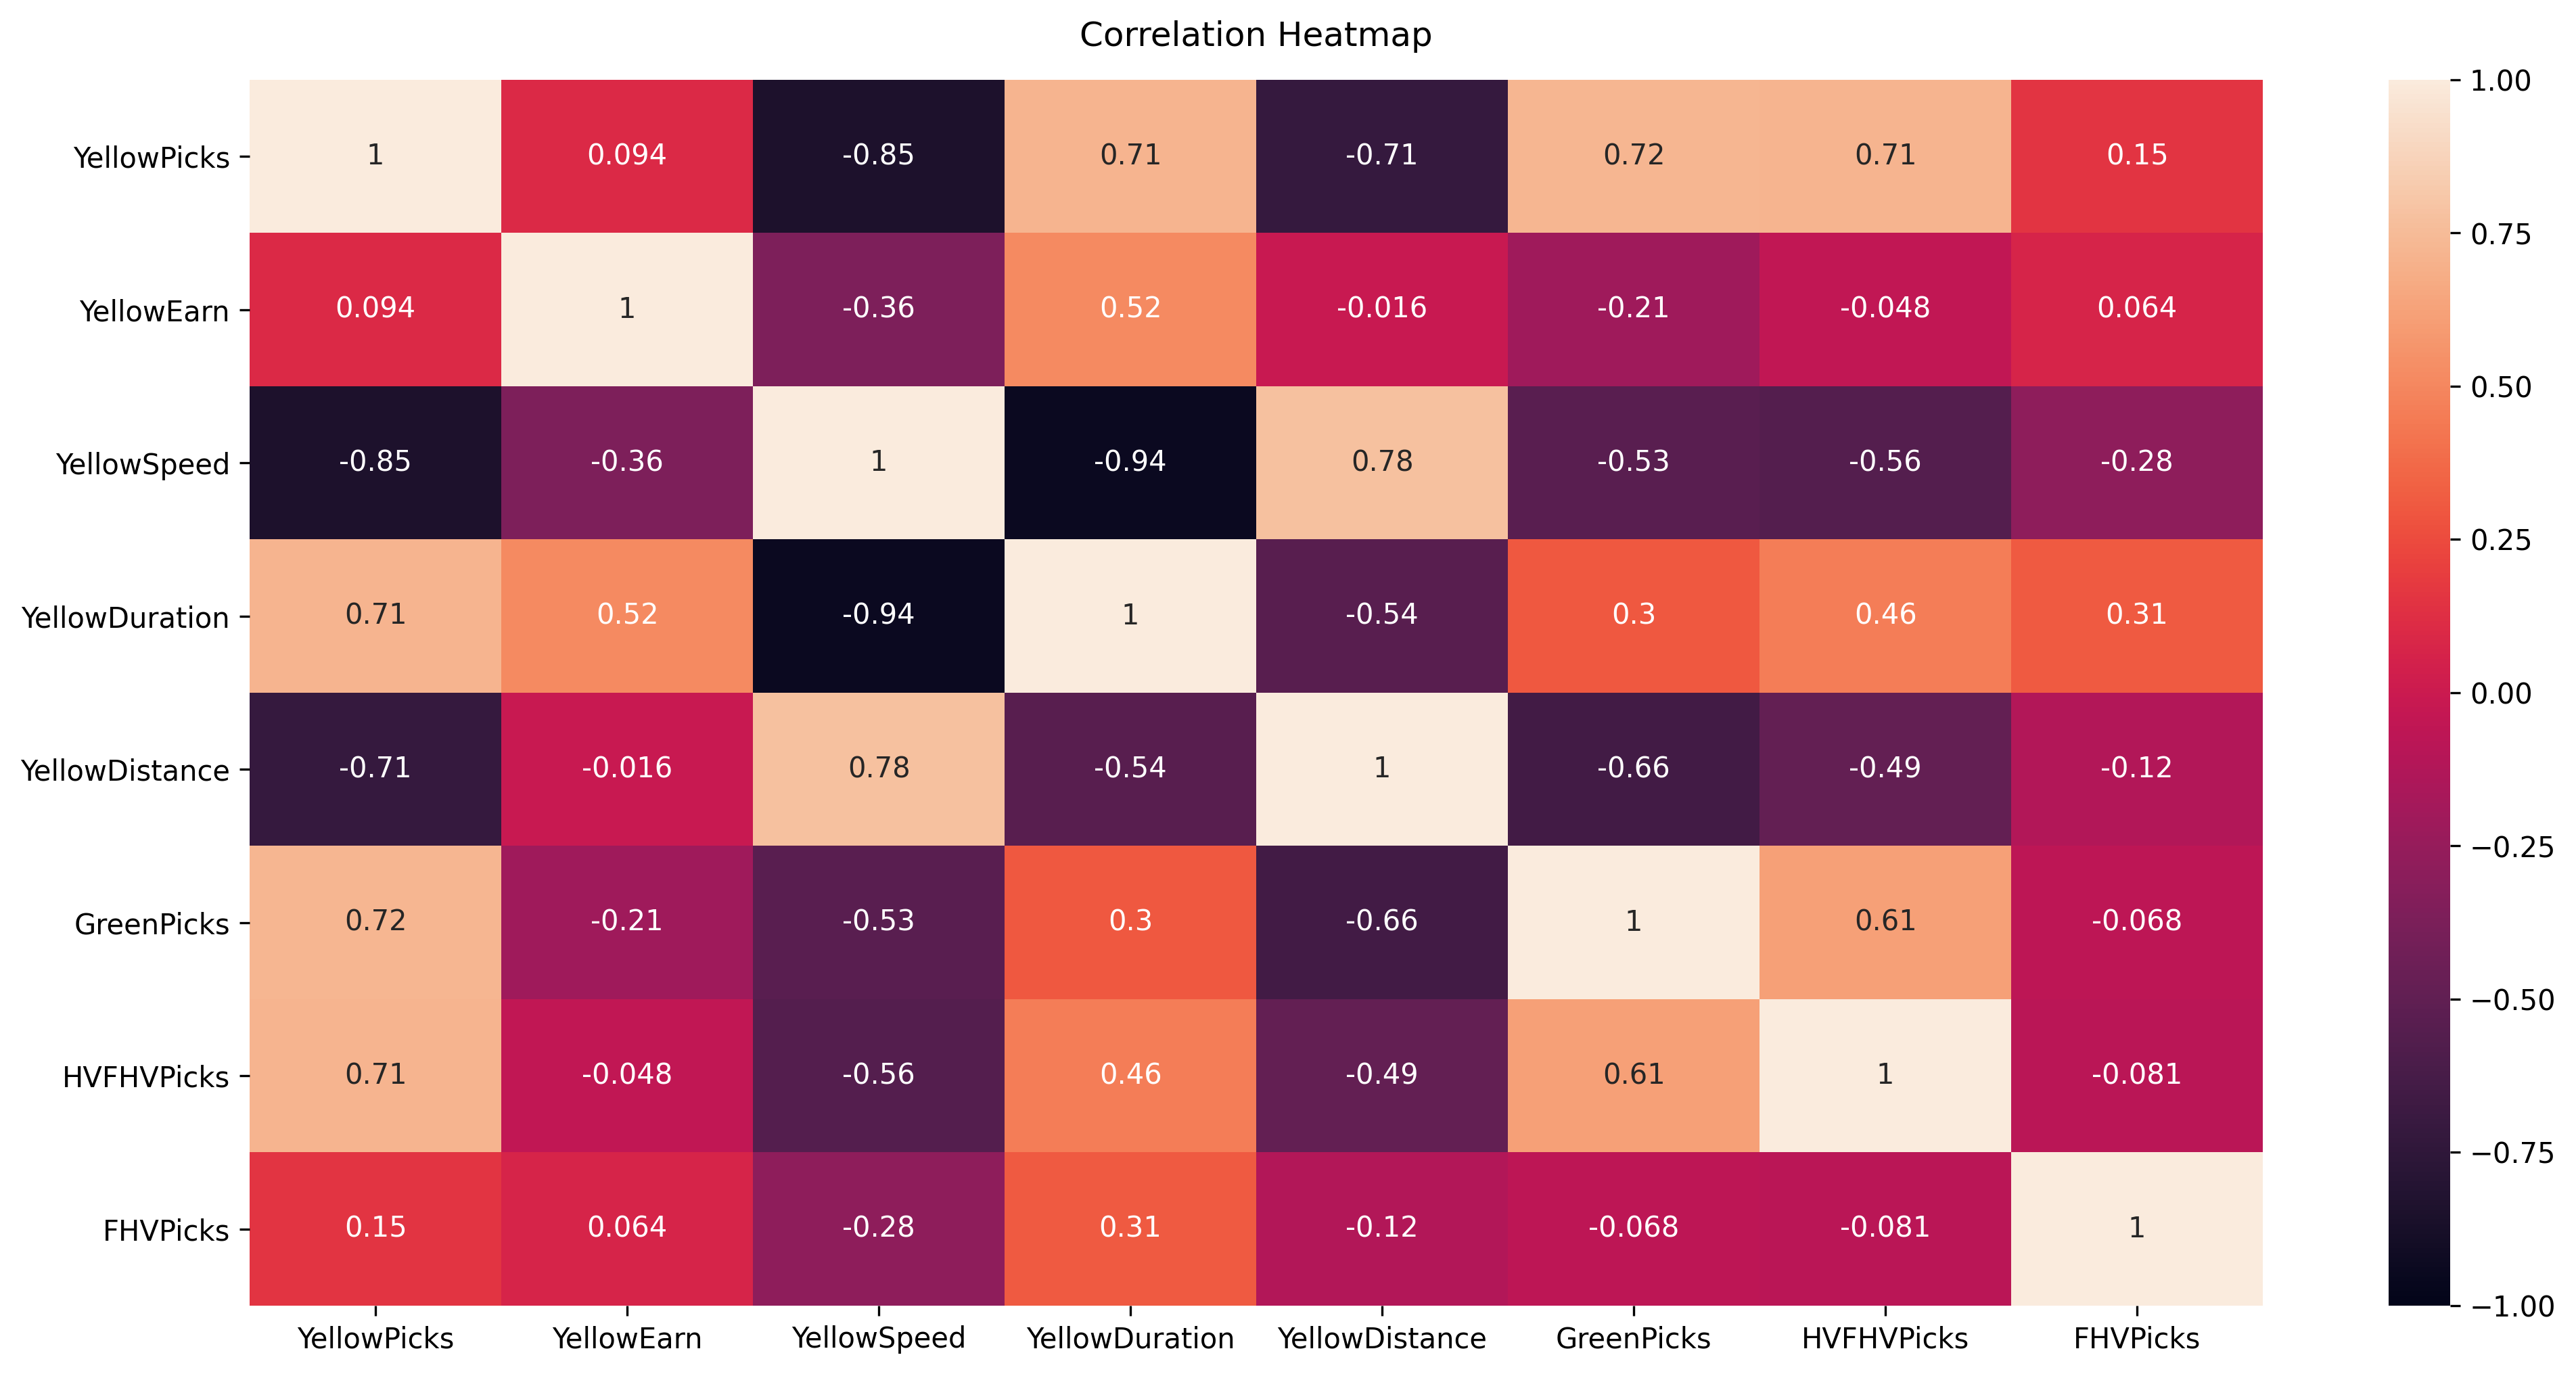

In [53]:
plt.figure(figsize=(16, 8))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(taxi_traffic_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [54]:
fpath = '../preprocessed_data/lm_data_weekday.parquet'

taxi_traffic_df.reset_index(inplace=True)
taxi_traffic_df.to_parquet(fpath)

### With Weekend

In [55]:
# ## Other Attributes

# ## Concatenate All Attributes:

# taxi_traffic_df = pd.DataFrame()
# taxi_traffic_df = pd.concat(
#     [
#     yellow_daily[yellow_daily["isWeekend"]==True]["date"],    
#     yellow_daily[yellow_daily["isWeekend"]==True]["NumofPickUps"], 
#      yellow_daily[yellow_daily["isWeekend"]==True]["avg_earn"], 
#      yellow_daily[yellow_daily["isWeekend"]==True]["avg_speed"], 
#      yellow_daily[yellow_daily["isWeekend"]==True]["avg_duration"], 
#      yellow_daily[yellow_daily["isWeekend"]==True]["avg_trip_distance"], 
#      green_daily[green_daily["isWeekend"]==True]["NumofPickUps"], 
#     hvfhv_daily[hvfhv_daily["isWeekend"]==True]["NumofPickUps"],
#     fhv_daily[fhv_daily["isWeekend"]==True]["NumofPickUps"]],
#     axis=1)
# symbols = ['date','YellowPicks','YellowEarn', 'YellowSpeed', 'YellowDuration', 'YellowDistance','GreenPicks', 'HVFHVPicks', 'FHVPicks']

# taxi_traffic_df.columns = symbols
# taxi_traffic_df.set_index("date",inplace=True)
# taxi_traffic_df.corr()




## Other Attributes

## Concatenate All Attributes:

taxi_traffic_df = pd.DataFrame()
taxi_traffic_df = pd.concat(
    [
    yellow_daily["isWeekend"],
    yellow_daily["date"],    
    yellow_daily["NumofPickUps"], 
     yellow_daily["avg_earn"], 
     yellow_daily["avg_speed"], 
     yellow_daily["avg_duration"], 
     yellow_daily["avg_trip_distance"], 
     green_daily["NumofPickUps"], 
    hvfhv_daily["NumofPickUps"],
    fhv_daily["NumofPickUps"]],
    axis=1)
symbols = ['HoliDay','date','YellowPicks','YellowEarn', 'YellowSpeed', 'YellowDuration', 'YellowDistance','GreenPicks', 'HVFHVPicks', 'FHVPicks']

taxi_traffic_df.columns = symbols
taxi_traffic_df.set_index("date",inplace=True)
taxi_traffic_df.corr()

,HoliDay,YellowPicks,YellowEarn,YellowSpeed,YellowDuration,YellowDistance,GreenPicks,HVFHVPicks,FHVPicks
HoliDay,1.000000,-0.314969,-0.582295,0.784670,-0.667050,0.827520,-0.204073,0.549137,-0.463323
YellowPicks,-0.314969,1.000000,0.361399,-0.746923,0.758118,-0.595355,0.774035,0.434744,0.290644
YellowEarn,-0.582295,0.361399,1.000000,-0.676985,0.747657,-0.518982,0.084611,-0.247021,0.325652
YellowSpeed,0.784670,-0.746923,-0.676985,1.000000,-0.949079,0.923563,-0.530564,0.132812,-0.505519
YellowDuration,-0.667050,0.758118,0.747657,-0.949079,1.000000,-0.765899,0.478078,-0.014004,0.494104
YellowDistance,0.827520,-0.595355,-0.518982,0.923563,-0.765899,1.000000,-0.477139,0.295992,-0.461337
GreenPicks,-0.204073,0.774035,0.084611,-0.530564,0.478078,-0.477139,1.000000,0.414230,0.089654
HVFHVPicks,0.549137,0.434744,-0.247021,0.132812,-0.014004,0.295992,0.414230,1.000000,-0.296389
FHVPicks,-0.463323,0.290644,0.325652,-0.505519,0.494104,-0.461337,0.089654,-0.296389,1.000000


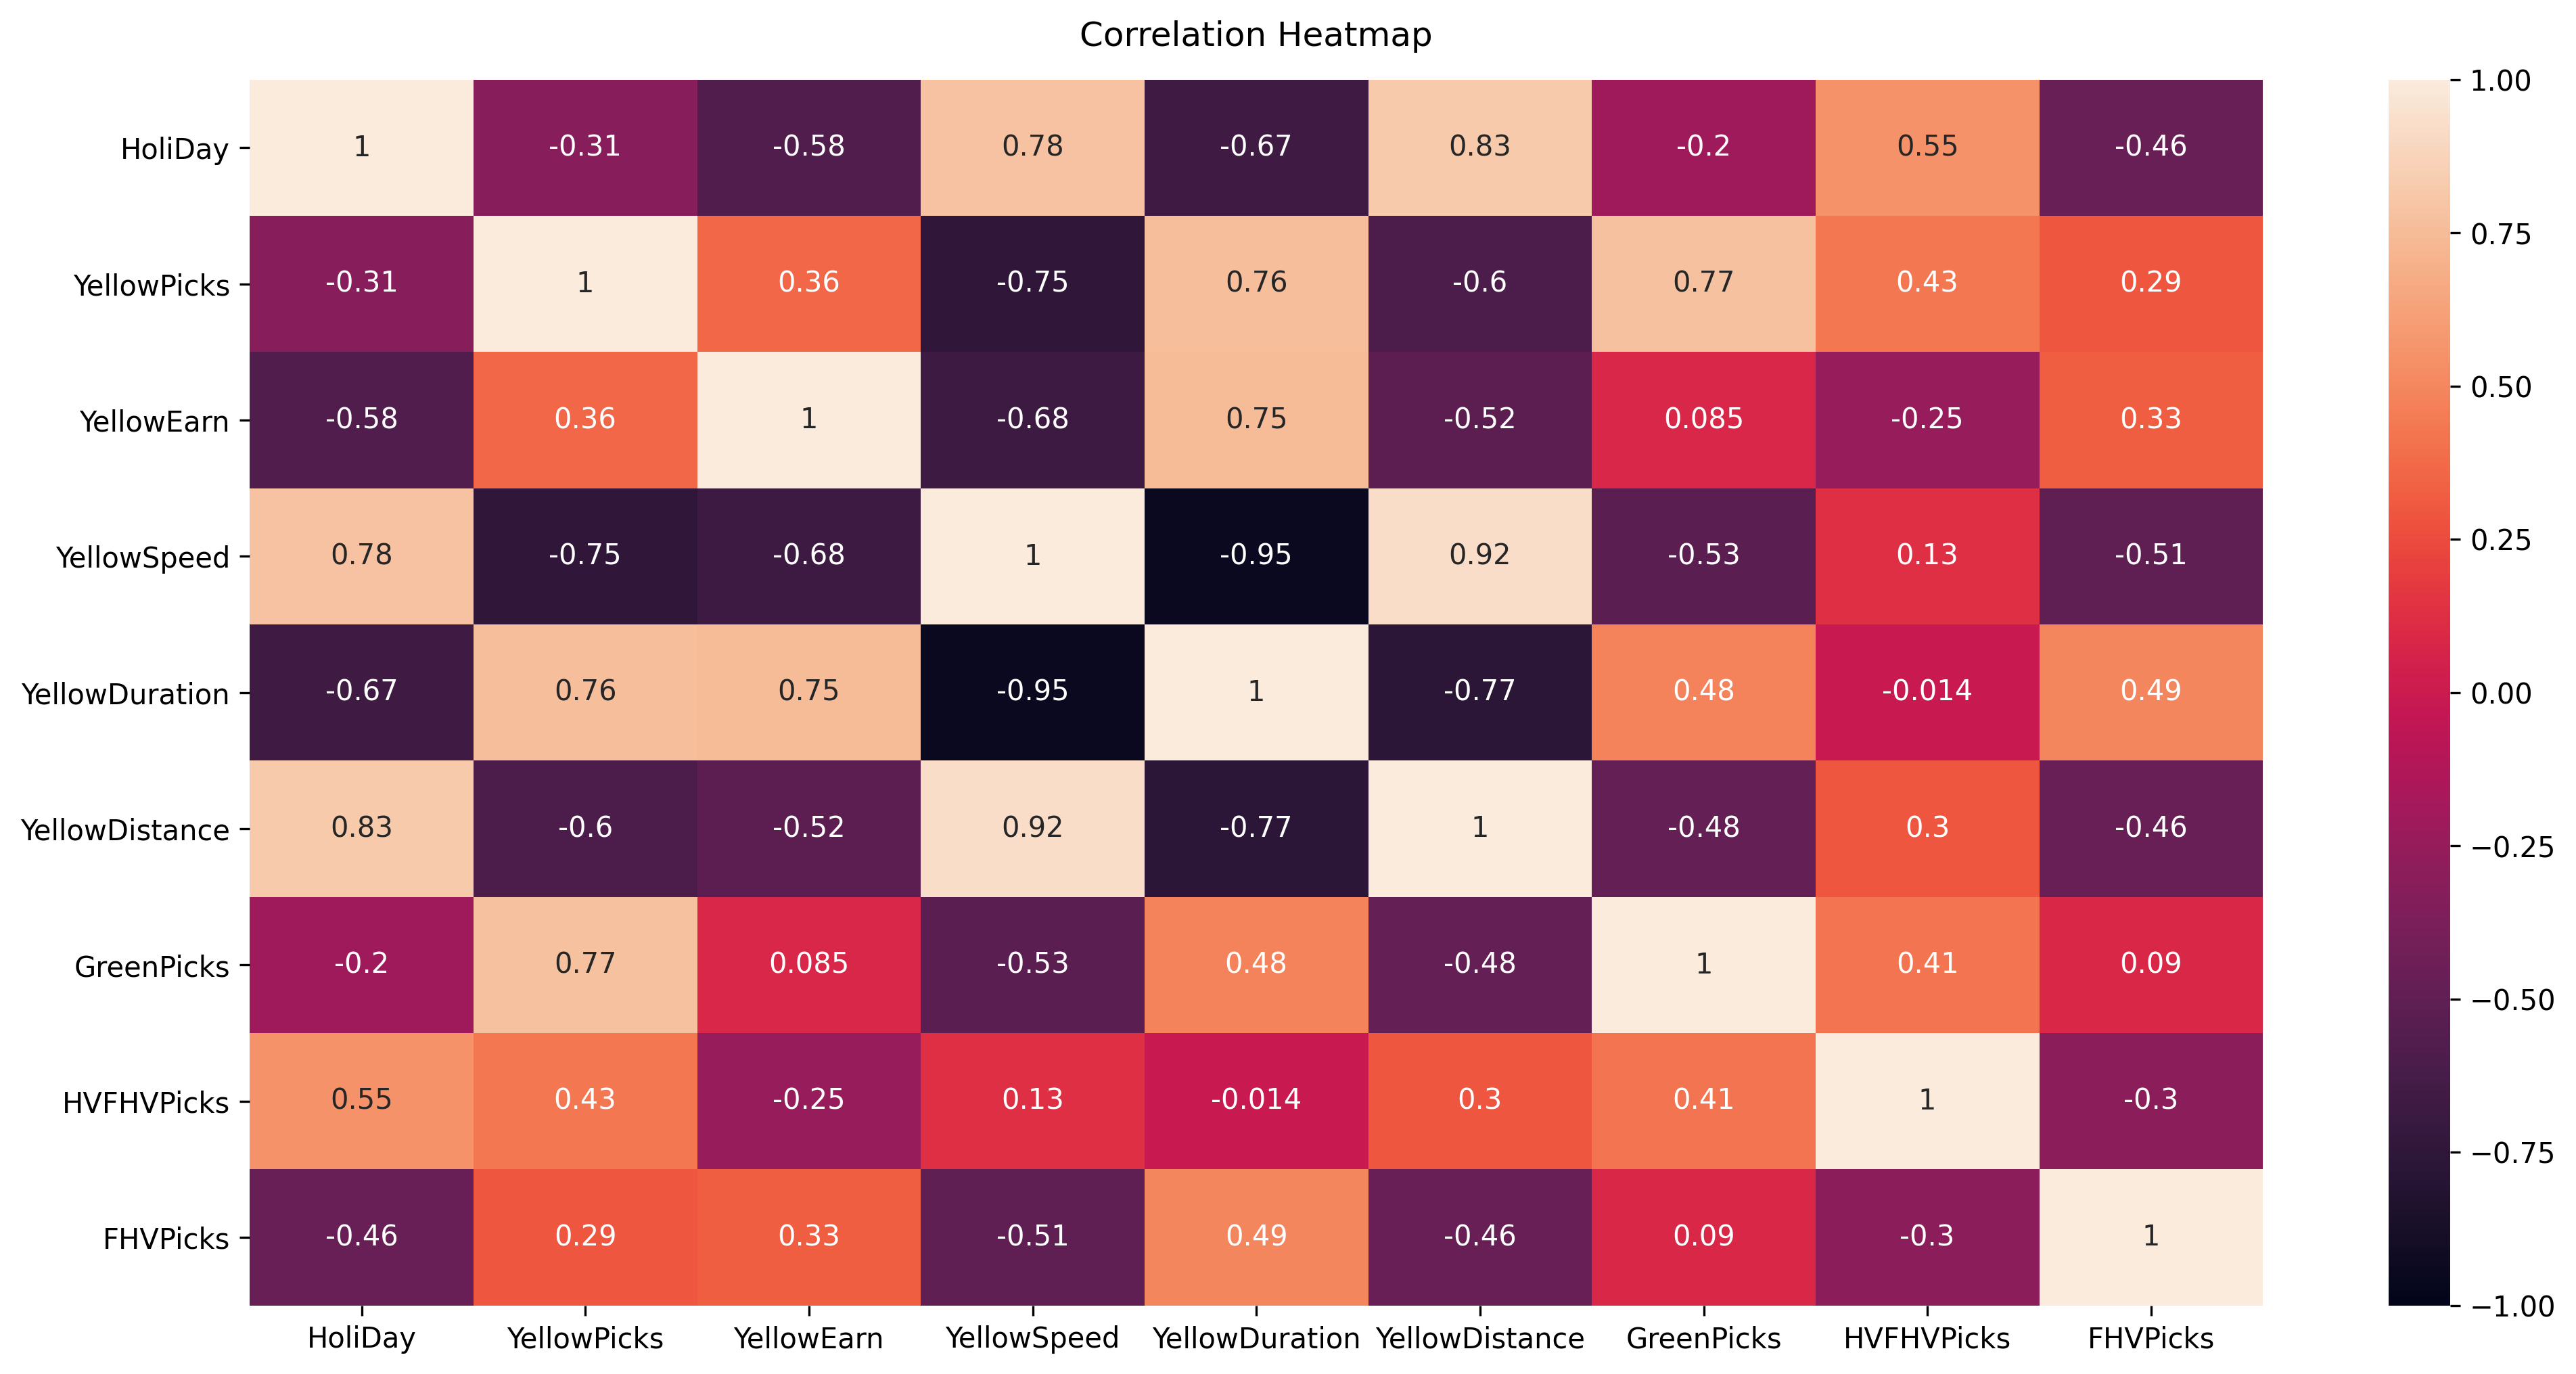

In [59]:
plt.figure(figsize=(16, 8))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(taxi_traffic_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

plt.savefig("../plots/heatmap.png")

In [57]:
fpath = '../preprocessed_data/lm_data_weekend.parquet'

taxi_traffic_df.to_parquet(fpath)

In [58]:
taxi_traffic_df

,HoliDay,YellowPicks,YellowEarn,YellowSpeed,YellowDuration,YellowDistance,GreenPicks,HVFHVPicks,FHVPicks
date,,,,,,,,,
2019-02-01,False,231065,12.278,10.04714,11.085,1.73666,20800,858400,68269
2019-02-02,True,212681,13.801,11.40007,10.329,1.83799,19052,864783,54686
2019-02-03,True,173534,14.118,12.93129,9.454,1.95224,15450,755193,47666
2019-02-04,False,178765,14.575,11.20141,10.355,1.81624,16542,591207,59975
2019-02-05,False,196263,14.839,10.64140,10.853,1.80001,16186,575586,58462
...,...,...,...,...,...,...,...,...,...
2019-05-06,False,171520,14.833,10.94314,10.775,1.81554,12487,627264,65262
2019-05-07,False,191999,15.040,10.32898,11.250,1.78609,13884,649689,65450
2019-05-08,False,192598,15.242,10.23370,11.572,1.79828,14081,631711,67380
